# Comparação de diferentes algoritmos para criação de modelos

Aluna: Lívia Belizário Rocha <br/>
Matrícula: 418304

Clique [aqui](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) para acessar o dataset.

### Descrição

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [37]:
%matplotlib inline

import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, recall_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [38]:
files = glob.glob(os.path.join('csv/', "*.csv"))
df_files = (pd.read_csv(f, sep=';') for f in files)
data = pd.concat(df_files)

print(f'Linhas: {data.shape[0]}')
data.head()

Linhas: 6497


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


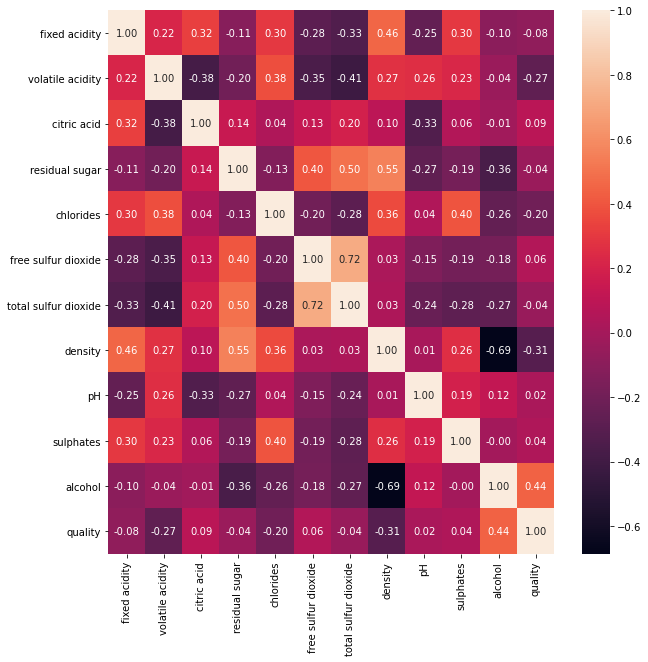

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f');

## Separação dos conjuntos de treino e teste: Regressão e Classificação

In [40]:
x_class = data.drop(columns=['quality'])
y_class = data["quality"]

x_reg = data.drop(columns=['quality', 'total sulfur dioxide'])
y_reg = data["total sulfur dioxide"]

In [30]:
SEED = 42

# Classificação

## Regressão Logísitca

In [41]:
scaler = StandardScaler()

training_x, test_x, training_y, test_y = train_test_split(x_class, y_class, 
                                                          random_state=SEED, 
                                                          test_size=0.2)

print(f'Treinamento: {len(training_x)} elementos | Teste: {len(test_x)} elementos')

training_x_staggered = scaler.fit_transform(training_x)
test_x_staggered = scaler.transform(test_x)

model = LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l2')
model.fit(training_x_staggered, training_y)
predictions = model.predict(test_x_staggered)
accuracy = (accuracy_score(test_y, predictions)) * 100
recall = (recall_score(test_y, predictions, average='macro')) * 100

print('Acurácia', accuracy)
print('Revogação:', recall)

Treinamento: 5197 elementos | Teste: 1300 elementos
Acurácia 53.61538461538462
Revogação: 23.707664120174428


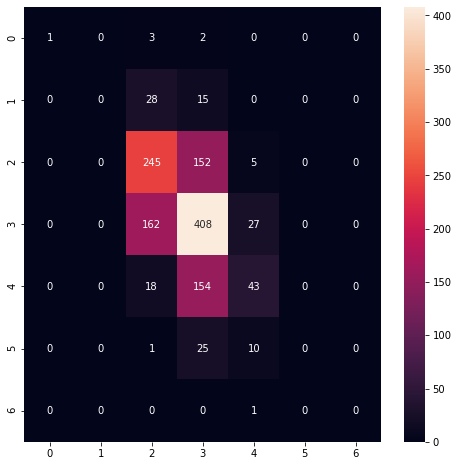

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(test_y, predictions), annot=True, fmt='d');

## Árvore de Decisão

As árvores de decisão são uma representação simples do conhecimento e uma forma eficiente de construir classificadores que podem predizer valores de determinados atributos de um conjunto de dados. A modelagem gráfica de uma árvore consiste de folhas, também chamadas de nós, e ramos. Onde cada nó representa o conjunto de dados de uma classificação, esta por sua vez representada pelos ramos.

In [43]:
scaler = StandardScaler()

training_x, test_x, training_y, test_y = train_test_split(x_class, y_class, 
                                                          random_state=SEED, 
                                                          test_size=0.2)

print(f'Treinamento: {len(training_x)} elementos | Teste: {len(test_x)} elementos')

training_x_staggered = scaler.fit_transform(training_x)
test_x_staggered = scaler.transform(test_x)

model = DecisionTreeClassifier(max_depth=15, criterion='entropy', random_state=SEED)
model.fit(training_x_staggered, training_y)
predictions = model.predict(test_x_staggered)
accuracy = (accuracy_score(test_y, predictions)) * 100
recall = (recall_score(test_y, predictions, average='macro')) * 100

print('Acurácia', accuracy)
print('Revogação:', recall)

Treinamento: 5197 elementos | Teste: 1300 elementos
Acurácia 61.846153846153854
Revogação: 33.814383980861976


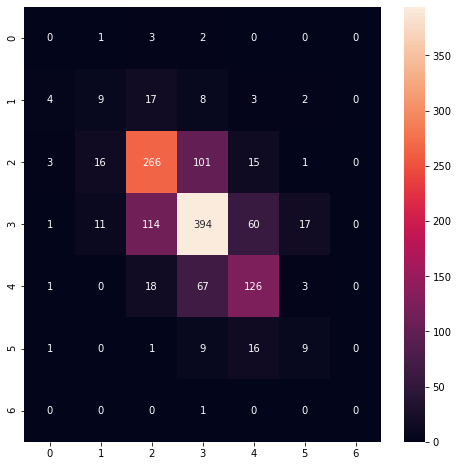

In [44]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(test_y, predictions), annot=True, fmt='d');

# Regressão

## Regressão Linear

In [45]:
scaler = StandardScaler()
scaler_y = StandardScaler()

training_x, test_x, training_y, test_y = train_test_split(x_reg, y_reg, 
                                                          random_state=SEED, 
                                                          test_size=0.2)

print(f'Treinaremos com {len(training_x)} elementos e testaremos com {len(test_x)} elementos')

training_x_staggered = scaler.fit_transform(training_x)
test_x_staggered = scaler.transform(test_x)

model = LinearRegression()
model.fit(training_x_staggered, training_y)
predictions = model.predict(test_x_staggered)
r2 = r2_score(test_y, predictions) * 100

print('Acurácia: ', r2)

Treinaremos com 5197 elementos e testaremos com 1300 elementos
Acurácia:  64.85755717440497


## Árvore de Regressão

Trabalha de forma parecida com a árvore de decisão de classificação, mas no caso da árvore de regressão, o valor obtido pelos nós de término nos dados de treinamento é o valor médio das suas observações.

In [46]:
scaler = StandardScaler()
scaler_y = StandardScaler()

training_x, test_x, training_y, test_y = train_test_split(x_reg, y_reg, 
                                                          random_state=SEED, 
                                                          test_size=0.2)

print(f'Treinaremos com {len(training_x)} elementos e testaremos com {len(test_x)} elementos')

training_x_staggered = scaler.fit_transform(training_x)
test_x_staggered = scaler.transform(test_x)

training_y_staggered = np.array(training_y).reshape(-1,1)
test_y_staggered = np.array(test_y).reshape(-1,1)

training_y_staggered = scaler_y.fit_transform(training_y_staggered)
test_y_staggered = scaler_y.transform(test_y_staggered)

model = DecisionTreeRegressor(max_depth=12, random_state=SEED)
model.fit(training_x_staggered, training_y_staggered)
predictions = model.predict(test_x_staggered)
r2 = r2_score(test_y_staggered, predictions) * 100

print('Acurácia: ', r2)

Treinaremos com 5197 elementos e testaremos com 1300 elementos
Acurácia:  70.56601987029376
